<h1>Does homefield advantage really exist?</h1>

Does homefield advantage really exist and if so how does it favor the home team?

For this dataset we want to explore teams and leagues performance at home as compared to on the road. Also explore which leaugue has the biggest homefield advantage. Bookmakers often favor the home team by .5 goals when two teams are evenly matched, is this a fair number? Also we will break down leagues and teams to find out which have the greatest homefield advantage, and which teams generate the most points.

The first step is to get our data into our notebook and parse the data so we can examine it more effeciently. The data is in a sql database. We will begin by importing some needed modules and then creating a connection to the database. We will then load the tables into objects to begin constructing our dataframe. 

In [12]:
# Importing the needed modules pandas sqlite3 numpy and matplotlib
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt 
# Creating a sql connection to the db
conn = sqlite3.connect("database.sqlite")
# Loading the tables into dataframes to analyze from sql tables
countries = pd.read_sql_query("select * from Country;", conn) # list of countries
leagues = pd.read_sql_query("select * from League;", conn) # List of leagues
teams = pd.read_sql_query("select * from Team;", conn) # List of teams
matches = pd.read_sql_query("select * from Match;", conn)# List of all match results
players = pd.read_sql_query("select * from Player;", conn) # List of team players
# display new df to test connections
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


<h1> Data wrangling process </h1>


<h2> Match countries and leagues</h2>
Our first step is to merge the countries and leagues db into one dataframe. This will allow us later to group and search by leagues to examine data. The two tables match on id and country_id column. We will merge on this column and then rename the columns to make sense for our new data structure. This will give us a dataframe with each country and the league name for that country. 

In [3]:
# Merge countries with league table and renames columns 
def country_league_table(countries, leagues):
    coun_leag= countries.merge(leagues, on=['id'],how='inner')
    coun_leag.rename(columns={'id': 'country_id', 'country_id': 'league_id'}, inplace=True)
    return coun_leag


league = country_league_table(countries, leagues)
league


,country_id,name_x,league_id,name_y
0,1,Belgium,1,Belgium Jupiler League
1,1729,England,1729,England Premier League
2,4769,France,4769,France Ligue 1
3,7809,Germany,7809,Germany 1. Bundesliga
4,10257,Italy,10257,Italy Serie A
5,13274,Netherlands,13274,Netherlands Eredivisie
6,15722,Poland,15722,Poland Ekstraklasa
7,17642,Portugal,17642,Portugal Liga ZON Sagres
8,19694,Scotland,19694,Scotland Premier League
9,21518,Spain,21518,Spain LIGA BBVA


<h2> Add match data </h2>

Next we want to add the matches for each season and league. The matches db contains lots of columns we don't need to examine, so we will select only the columns we need. Then we will merge with the object we previously created using country and league id and again rename columns to make sense for our new dataframe.

In [4]:
# Adds the matches too the table for each season and renames columns to make sense
def add_matches(table, matches):
    matches = matches[['id', 'country_id', 'league_id','season','stage', 'date', 'match_api_id', 'home_team_api_id',
                   'away_team_api_id', 'home_team_goal', 'away_team_goal', ]]
    table = table.merge(matches, on=['country_id', 'league_id'], how='inner') 
    table.rename(columns={'name_x': 'country', 'name_y': 'league'}, inplace=True)
    return table

table_matches = add_matches(league, matches)
table_matches


,country_id,country,league_id,league,id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,Belgium,1,Belgium Jupiler League,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,1,Belgium,1,Belgium Jupiler League,2,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,1,Belgium,1,Belgium Jupiler League,3,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,1,Belgium,1,Belgium Jupiler League,4,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,1,Belgium,1,Belgium Jupiler League,5,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3
5,1,Belgium,1,Belgium Jupiler League,6,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,1
6,1,Belgium,1,Belgium Jupiler League,7,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,2
7,1,Belgium,1,Belgium Jupiler League,8,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,2
8,1,Belgium,1,Belgium Jupiler League,9,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,0
9,1,Belgium,1,Belgium Jupiler League,10,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,1


<h2> Adding Teams </h2>

Our current dataframe does not include the team names. The 'matches' table we merged does have an api id for the home and away team for each match. We will  use those to merge the teams database into our dataframe and add the team names to each match. Again dropping unneeded columns and renaming others to make sense for our dataframe. Also we will add columns for home and away goal difference. We will compute those numbers using a vector operation on the dataframe. Also we will create a function to compute those results and then add the points earned by home and away teams to dataframe. This will allow us to compute points for each league, team and season and find the season champion. We call the function using applymap and return a new dataframe with team names added and point totals. 

In [10]:
#Detemines the number of points to give by examining each game score and adding to points for that team
def count_points(team_goal_diff):
    if team_goal_diff >0:
        return 3
    elif team_goal_diff == 0:
        return 1
    else:
        return 0

def add_teams(table, teams):
    hcatalog= table.merge(teams, left_on=['home_team_api_id'], right_on=['team_api_id'], how='inner')
    hcatalog.drop( columns= ['team_api_id', 'team_short_name'], inplace=True)
    hcatalog.rename(columns={'team_long_name': 'home_team_name','team_fifa_api_id': 'home_team_fifa_api_id'}, inplace=True)
    acatalog= table.merge(teams, left_on=['away_team_api_id'], right_on=['team_api_id'], how='inner')
    acatalog.drop(columns= ['team_api_id', 'team_short_name'], inplace=True)
    acatalog.rename(columns={'team_long_name': 'away_team_name', 'team_fifa_api_id': 'away_team_fifa_api_id'}, inplace=True)
    acatalog = pd.DataFrame(acatalog, columns=['match_api_id','away_team_fifa_api_id','away_team_name'])
    acatalog = pd.DataFrame(acatalog, columns=['match_api_id','away_team_fifa_api_id','away_team_name'])
    ncatalog = hcatalog.merge(acatalog, on = ['match_api_id'], how='inner')
    ncatalog['home_goal_diff'] = ncatalog['home_team_goal']-ncatalog['away_team_goal']
    ncatalog['away_goal_diff'] = ncatalog['away_team_goal']-ncatalog['home_team_goal']
    ncatalog['num_home_points'] = ncatalog[['home_goal_diff']].applymap(count_points)
    ncatalog['num_away_points'] = ncatalog[['away_goal_diff']].applymap(count_points)
    ncatalog['total points'] = ncatalog['home_team_goal'] + ncatalog['away_team_goal']
    return ncatalog

ncatalog = add_teams(table_matches, teams)
ncatalog

,country_id,country,league_id,league,id_x,season,stage,date,match_api_id,home_team_api_id,...,id_y,home_team_fifa_api_id,home_team_name,away_team_fifa_api_id,away_team_name,home_goal_diff,away_goal_diff,num_home_points,num_away_points,total points
0,1,Belgium,1,Belgium Jupiler League,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,...,1,673.0,KRC Genk,675.0,Beerschot AC,0,0,1,1,2
1,1,Belgium,1,Belgium Jupiler League,29,2008/2009,12,2008-11-15 00:00:00,492583,9987,...,1,673.0,KRC Genk,546.0,KSV Roeselare,0,0,1,1,2
2,1,Belgium,1,Belgium Jupiler League,47,2008/2009,14,2008-11-29 00:00:00,492651,9987,...,1,673.0,KRC Genk,1750.0,KSV Cercle Brugge,1,-1,3,0,5
3,1,Belgium,1,Belgium Jupiler League,65,2008/2009,16,2008-12-13 00:00:00,492713,9987,...,1,673.0,KRC Genk,670.0,Sporting Charleroi,1,-1,3,0,1
4,1,Belgium,1,Belgium Jupiler League,94,2008/2009,19,2009-01-24 00:00:00,492805,9987,...,1,673.0,KRC Genk,1747.0,RAEC Mons,2,-2,3,0,2
5,1,Belgium,1,Belgium Jupiler League,121,2008/2009,21,2009-02-07 00:00:00,492992,9987,...,1,673.0,KRC Genk,15005.0,SV Zulte-Waregem,-1,1,0,3,3
6,1,Belgium,1,Belgium Jupiler League,143,2008/2009,23,2009-02-20 00:00:00,493014,9987,...,1,673.0,KRC Genk,111560.0,Royal Excel Mouscron,0,0,1,1,2
7,1,Belgium,1,Belgium Jupiler League,158,2008/2009,25,2009-03-07 00:00:00,493029,9987,...,1,673.0,KRC Genk,NaN,FCV Dender EH,1,-1,3,0,7
8,1,Belgium,1,Belgium Jupiler League,179,2008/2009,27,2009-03-21 00:00:00,493050,9987,...,1,673.0,KRC Genk,NaN,Tubize,3,-3,3,0,3
9,1,Belgium,1,Belgium Jupiler League,188,2008/2009,28,2009-04-04 00:00:00,493059,9987,...,1,673.0,KRC Genk,681.0,KVC Westerlo,-3,3,0,3,5


<h1> Examining the data </h1>

<h2> Home goals vs Away goals all teams </h2>

First let's take a look at the total number of goals for all leagues. Also we will split those goals into home vs away goals to see if home teams have scored more goals than away teams. We will take the sum of all away goals and home goals and then plot those to a bar graph.

[40127, 30160]


([<matplotlib.axis.XTick at 0x6fd5e860>,
 <a list of 2 Text xticklabel objects>)

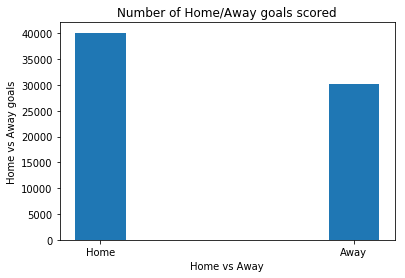

In [59]:
# sum home and away goals add totals and plot to screen using matplotlib
home_goals = ncatalog['home_team_goal'].sum()
away_goals = ncatalog['away_team_goal'].sum()
all_total_goals = [home_goals,away_goals]
print all_total_goals
bar = plt.bar(range(len(all_total_goals)), all_total_goals, 0.2)
plt.xlabel("Home vs Away")
plt.ylabel("Home vs Away goals")
plt.title("Number of Home/Away goals scored")
plt.xticks([0,1], ['Home', 'Away'])



The results returned show that home teams have scored 40,127 goals while away teams have scored 30,160. That is almost a 10k difference in favor of the home teams. We can calculate the percentage difference as follows:

Increase = New Number - Original Number
Then:  divide the increase by the original number and multiply the answer by 100.
% increase = Increase ÷ Original Number × 100.
(40127 -30160) / 30160 * 100 = 33.047

So the home teams score 33% more goals on avarage than the away team. So in a complete vacuum you have a 33% chance of scoring a win on any  random team by betting on the home team. Lets take a look at the mean and std for home and away goals.

count    25979.000000
mean         1.544594
std          1.297158
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: home_team_goal, dtype: float64
count    25979.000000
mean         1.160938
std          1.142110
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: away_team_goal, dtype: float64


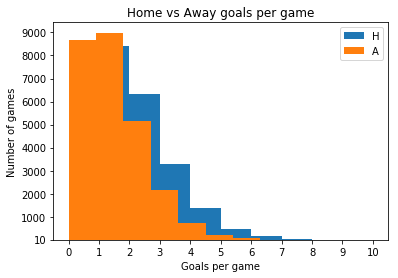

In [240]:
# Call pandas describe on the home and away goal columns
print ncatalog['home_team_goal'].describe()
print ncatalog['away_team_goal'].describe()


# Plot home vs away goal for each match
tothom = ncatalog['home_team_goal']
totawa = ncatalog['away_team_goal']
plt.hist(tothom)
plt.hist(totawa)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], [0,1,2,3,4,5,6,7,8,9,10]) #set tick names
plt.yticks( [10,1000,2000,3000,4000,5000,6000,7000,8000,9000]) # set tick names
plt.title("Home vs Away goals per game")
plt.ylabel("Number of games")
plt.xlabel("Goals per game")
plt.legend('HA')


So the avgerage number of  goals for home teams is 1.54 while for away teams it is 1.16 goals per game. The std are relatively low for each which we can see by plotting the results. Here we see the majority of games fall in 0-2 goals range which lines up with the std with the outliers being relatively small compared to the standard. So home teams have a distinct advantage over away teams. What about leagues and teams however? Which leagues have the best home field goal advantage and which teams? Let's examine the data more to find out.

First lets write a function to compute the goal difference for home teams and for away teams. Take that value and plot it to
the screen. We will then call the function on leagues and teams and examine the data.

In [241]:
def goal_difference_away(sortvalue):
    # Computes away goal difference and plots to the screen can be filtered by league, team or season  
    home_league = ncatalog.groupby([sortvalue]).mean()['home_team_goal'] 
    away_league = ncatalog.groupby([sortvalue]).mean()['away_team_goal']
    goal_difference = away_league - home_league
    goal_difference = goal_difference.sort_values(ascending=False).head(11)
    goal_difference= goal_difference.plot(kind='bar', title='Away goal difference')
    goal_difference.set_ylabel("Goals Per Game",fontsize=18)
    return goal_difference
   

In [242]:
def goal_difference_home(sortvalue):
    # Computes home goal difference and plots to the screen can be filtered by league, team or season 
    home_league = ncatalog.groupby([sortvalue]).mean()['home_team_goal'] 
    away_league = ncatalog.groupby([sortvalue]).mean()['away_team_goal']
    goal_difference = home_league - away_league
    goal_difference = goal_difference.sort_values(ascending=False).head(11) 
    goal_difference= goal_difference.plot(kind='bar', title='Home goal difference')
    goal_difference.set_ylabel("Goals Per Game",fontsize=18)
    return goal_difference


0.40958572019062733

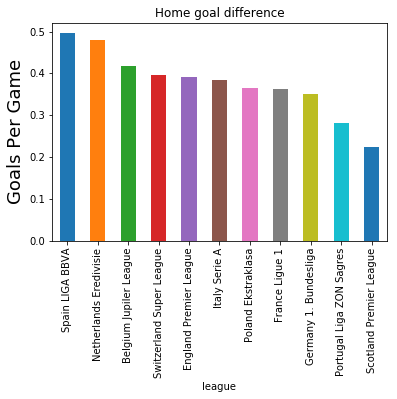

In [257]:
leag_goal_diff_home = goal_difference_home('league')




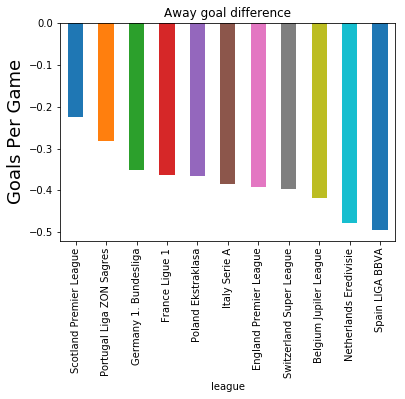

In [245]:
leag_goal_diff_away = goal_difference_away('league')

So the league with the biggest home goal advantage is Spain LIGA followed by the Netherlands Eredivisie. In both leagues the home team averages almost a half a goal more than the away team. All the leagues show a positive difference with the Scotland Premier bringing up the rear at about 0.26 home goal advantage. None of the leagues showed any positive difference for the away teams.

Lets continue on and look at teams next and we will grab and plot the first 11 teams. Lets see if we can find out the toughest venues to play at as an away team.

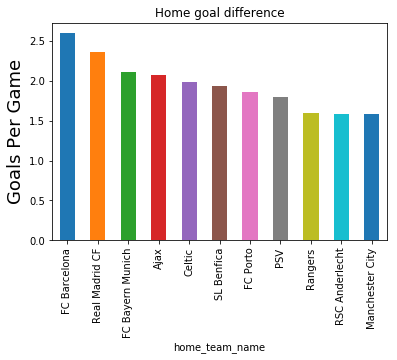

In [248]:
team_goal_diff_home = goal_difference_home('home_team_name')


Here we see FC Barcelona has a 2.5 goal advantage at home closely followed by Real Madrid. Both of these clubs play in the Spanish league. I was surprised at how home many teams were near the 2 goal advantage at home. From a quick look it appears Barcelona is the toughest venue to win in as an away team. Now Lets look at away teams goal differences.

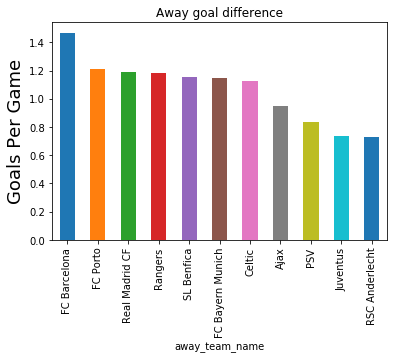

In [247]:
team_goal_diff_away = goal_difference_away('away_team_name')

I was suprised here at the number of teams that had a positive away goal difference. Barcelona again leads the pack at 
almost a +1.5 goal difference as the away team. Most surprising is that FC Porto follows as a stong road team. Next lets total up the goals by team and see which teams are our top goal scorers overall

Lets write a function to compute the total number of goals and return us a dataframe to work with. We can sum up the home and away goals and merge these two into a dataframe adding the total of the two as an additional column. Lets also create a dataframe for totaling the points for each team in the same manner and return the top 20 teams for each.


In [249]:
def total_goals_all(table):
    # returns dataframe with goal totals for all teams
    home= table.groupby(['home_team_name']).sum()['home_team_goal']
    away = table.groupby(['away_team_name', ]).sum()['away_team_goal']
    total = home+away
    df =  home.to_frame().join([away,total])
    df.rename(columns={'away_team_goal': 'away goals','home_team_goal':'home goals', 0 : 'total goal'}, inplace=True)
    df.rename_axis("Teams")
    df = df.sort_values('total goal',ascending=False)
    return df

def total_points_all(table):
    home= table.groupby(['home_team_name']).sum()['num_home_points']
    away = table.groupby(['away_team_name', ]).sum()['num_away_points']
    total = home+away
    df =  home.to_frame().join([away,total])
    df.rename(columns={'num_away_points': 'away points','num_home_points':'home points', 0 : 'total points'}, inplace=True)
    df.rename_axis("Teams")
    df = df.sort_values('total points',ascending=False)
    return df


 
    




In [250]:
goal_table = total_goals_all(ncatalog)
goal_table.head(20)

,home goals,away goals,total goal
home_team_name,,,
FC Barcelona,495,354,849
Real Madrid CF,505,338,843
Celtic,389,306,695
FC Bayern Munich,382,271,653
PSV,370,282,652
Ajax,360,287,647
FC Basel,344,275,619
Manchester City,365,241,606
Chelsea,333,250,583


Here we see Barcelona and Real Madrid with a big lead over the rest of the clubs. Things to note, none of the teams have scored more away goals than home goals. So even the best teams are still better at home in relation to goal scoring than on the road.
Lets plot these on some graphs below for the top 20 again.


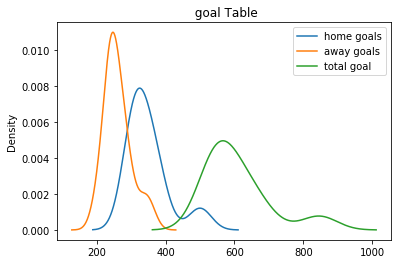

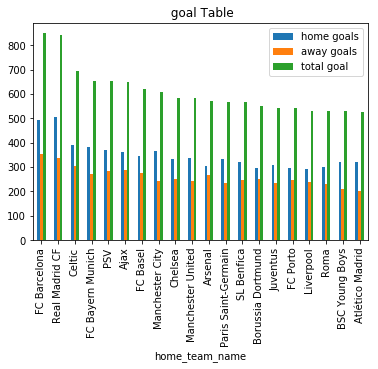

In [199]:
goal_table = goal_table.head(20)
goal_table.plot(kind='kde', title=' goal Table')
goal_table.plot(kind='bar', title=' goal Table')

<h1> Points breakdown </h1>
Next let's look at points by league and by team and see who are the top teams. For points I also want to see which teams had the best individual point total for a season and see home vs away points. So first lets look at leagues by calling a sum function on our dataframe and sorting the results and plotting to screen.


league
Spain LIGA BBVA             8416
England Premier League      8337
France Ligue 1              8261
Italy Serie A               8255
Netherlands Eredivisie      6763
Germany 1. Bundesliga       6747
Portugal Liga ZON Sagres    5623
Poland Ekstraklasa          5235
Scotland Premier League     5025
Belgium Jupiler League      4759
Switzerland Super League    3920
dtype: int64


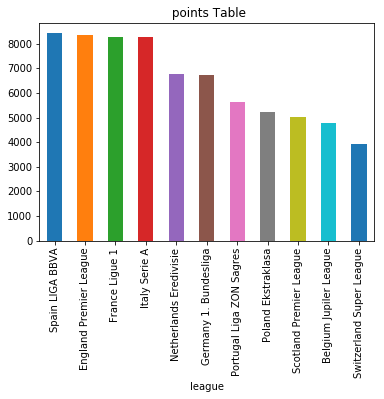

In [260]:
# Sum total points column on league filter sort object and then plot to the screen
league_points_home = ncatalog.groupby(['league']).sum()['num_home_points']
league_points_away = ncatalog.groupby(['league']).sum()['num_away_points']
league_points_total = league_points_away + league_points_home
league_points_total = league_points_total.sort_values(ascending=False)
print league_points_total
league_points_total.plot(kind='bar', title=' points Table')

As expected the Spanish and English leagues lead the pack as both leagues have a number of top tier teams. This info is also subjective which I will explain later. For now lets look at the point totals by season and team and return our top 20 season point totals.

In [254]:
# Total points filtered by team name 
season_points_home = ncatalog.groupby(['home_team_name','season']).sum()['num_home_points']
season_points_away = ncatalog.groupby(['away_team_name','season']).sum()['num_away_points']
season_point_tot = season_points_home + season_points_away
season_point_tot= season_point_tot.sort_values(ascending=False)
season_point_tot.head(20)

home_team_name       season   
Juventus             2013/2014    102
FC Barcelona         2012/2013    100
Real Madrid CF       2011/2012    100
FC Barcelona         2009/2010     99
Celtic               2013/2014     99
Paris Saint-Germain  2015/2016     96
Real Madrid CF       2009/2010     96
FC Barcelona         2010/2011     96
                     2014/2015     94
Rangers              2010/2011     93
Celtic               2011/2012     93
                     2014/2015     92
Real Madrid CF       2010/2011     92
                     2014/2015     92
Celtic               2010/2011     92
FC Bayern Munich     2012/2013     91
FC Barcelona         2015/2016     91
                     2011/2012     91
Juventus             2015/2016     91
FC Bayern Munich     2013/2014     90
dtype: int64

So the highest point total belongs to Juventus for the 2013/2014 with 102 points in 38 games. As expected several of the seasons belong to our top goal scorers Barcelona and Real Madrid and all the teams are on our top goal scorers list we generated earlier. Next lext look at the top 20 in points over all seasons.

In [255]:
# Call total points on dataframe object we created earlier and displaying top 20
points_table = total_points_all(ncatalog)
points_table.head(20)


,home points,away points,total points
home_team_name,,,
FC Barcelona,405,340,745
Real Madrid CF,398,322,720
Celtic,383,321,704
Juventus,345,288,633
Manchester United,364,269,633
FC Bayern Munich,341,282,623
FC Basel,335,269,604
Ajax,333,269,602
Paris Saint-Germain,338,263,601


Again as expected Barcelona and Real Madrid are our leaders. The surprising data point in this table is the inclusion of 
Olympique Lyonnais and Napoli neither of whom appeared on any of our top goal tables. At this point we will end our exploration and draw some very general obeservations based on the data given.

<h1> Conclusions</h1>

<h3> Home vs away goal advantage </h3>
Based on the limited data set we can draw the conclusion that the home team does have an advantage in scoring goals at home.
On average the home generates 33% more goals than the away team, this is aggregated across all leagues. Individually all the leagues show an advatage to home teams with the Spanish league being first with a +.5 home goal davantage. The Scottish leauge shows the least home goal advantage at about a +.26 home goal advantage. However taking a deeper look at the data we can also see that this trend does not apply to all teams as several of the top teams actually have a positive away goal difference. For example Barcelona is +1.4. Home or away they have shown to be a tough draw

<h3> Is -.5 to equally matched home teams fair betting odds </h3>
This really depends on what you call fair. The house has to mantain a certain advantage and they do so first on the payout by taking a percetage of every bet win or loose. Now to address the -.5. The home team does have an advantage on goals scored.We can see  by looking at the home goal mean 1.54 compared to the away team gal mean of 1.16. This is spread across all games so in vacuum giving the away team and additional .50 goals on average will give them the slight advantage. We know that the home team only scores 33% more goals than the away team and the home team now needs to out score the away team by 2 to register a win. We also know this doesn't apply to top tier teams  as they generally out score the away team by at least 2 on average. So with 2 equally matched teams in my obersavation the away team has a signifigant betting advantage. If we examined the data further and broke down matches I'm sure we would find most of the goal disparities are due to unevenly matched teams. This can happen frequently though due to the relegation system of soccer

<h3> Which league has the best home advantage </h3>
This title goes to the spanish league with a +.50 home goal advantage and the least advantage to the Scottish league at +.26
advantage. However I will point out that this maybe due in part to the Spanish league being very top heavy, Barcelona and Real Madrid for instance have never been relegated in club history. The Scottish league maybe a better indication of home advantage as it teams are more evenly matched than the other major leagues

<h3> Team points and goals scored </h3>
We were able to determine that a handful of teams actually have a positive away goal difference. In general these same teams match up to goal leaders for home and away goals. Were also able to determine that Barcelona and Real Madrid have a big lead in goal totals. We used a bell curve to show how those teams spread out displacement for goal leaders. Those two teams also lead in total points for home and away games although Celtic is only one point behind Real Madrid in away team points. The most points in any season was by Juventus for the 2013/2014 with 102 points in 38 games. Both Barcelona and Real Madrid have also had 100 point seasons.

<h3> Best home advantage/ Overall best team </h3>
This goes to Barcelona with Real Madrid a close second. Barcelona has positive home and away goal advantage at 2.5 and 1.4 respectively. They also lead all teams in points and goals scored and have reached the 100 point( out of a possible 114) season plateau.

<h3> Disclaimer </h3>
These observations are subjective due to the limited data set and nature of soccer. For example League stats, all leagues do not have the same number of teams and some leagues are volatile like the Swiss Super league and always changing and morphing into other leagues. Also regarding teams, not all teams have played the same number of games and that is due to the nature of soccer. It is possible for a poor performing team to be relegated out of the top division to a lower one  and have to earn it's spot back. Our data only looks at top tier performances in each league so teams that have been relegated will have fewer games. I would have loved to explore the data further but the matches and player api's are no longer working.